## **Menentukan Kesegaran Ikan Berdasarkan Mata**
dengan klasifikasi segar dan taksegar, menggunakan model sequential

In [ ]:
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
print(tf.__version__)

2.2.0


In [ ]:
import os

base_dir = '/content/drive/My Drive/images'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'val')

In [ ]:
os.listdir('/content/drive/My Drive/images/train')

['taksegar', 'segar']

In [ ]:
os.listdir('/content/drive/My Drive/images/val')

['segar', 'taksegar']

In [ ]:
train_segar_dir = os.path.join(train_dir, 'segar')
train_tidak_segar_dir = os.path.join(train_dir, 'taksegar')

validation_segar_dir = os.path.join(validation_dir, 'segar')
validation_tidak_segar_dir = os.path.join(validation_dir, 'taksegar')

In [ ]:
train_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    horizontal_flip=True,
                    shear_range = 0.2,
                    fill_mode = 'nearest')

test_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    horizontal_flip=True,
                    shear_range = 0.2,
                    fill_mode = 'nearest')

In [ ]:
train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(250, 250),
        batch_size=4,
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(250, 250),
        batch_size=4,
        class_mode='binary')

Found 100 images belonging to 2 classes.
Found 100 images belonging to 2 classes.


In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Activation
from keras.preprocessing.image import ImageDataGenerator

size_ = 250

model = Sequential()

model.add(Conv2D(4, (3, 3), input_shape = (size_, size_, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Flatten())

model.add(Dense(units = 8, activation = 'relu'))
model.add(Dense(units = 1, activation = 'sigmoid'))

model.compile(optimizer = 'sgd', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 248, 248, 4)       112       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 124, 124, 4)       0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 61504)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 8)                 492040    
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 9         
Total params: 492,161
Trainable params: 492,161
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(loss='binary_crossentropy',
              optimizer=tf.optimizers.Adam(),
              metrics=['accuracy'])

In [ ]:
model.fit(
      train_generator,
      steps_per_epoch=100,
      epochs=10,
      validation_data=validation_generator,
      validation_steps=100
      )

Epoch 1/10
100/100 [==============================] - 96s 958ms/step - loss: 0.5785 - accuracy: 0.7375 - val_loss: 0.4524 - val_accuracy: 0.6800
Epoch 2/10
100/100 [==============================] - 28s 275ms/step - loss: 0.2689 - accuracy: 0.8775 - val_loss: 1.6792 - val_accuracy: 0.6950
Epoch 3/10
100/100 [==============================] - 27s 273ms/step - loss: 0.1566 - accuracy: 0.9425 - val_loss: 2.2257 - val_accuracy: 0.6475
Epoch 4/10
100/100 [==============================] - 27s 273ms/step - loss: 0.0900 - accuracy: 0.9800 - val_loss: 0.8181 - val_accuracy: 0.6625
Epoch 5/10
100/100 [==============================] - 27s 274ms/step - loss: 0.0819 - accuracy: 0.9800 - val_loss: 2.4366 - val_accuracy: 0.6425
Epoch 6/10
100/100 [==============================] - 28s 275ms/step - loss: 0.0374 - accuracy: 0.9950 - val_loss: 1.3918 - val_accuracy: 0.6425
Epoch 7/10
100/100 [==============================] - 28s 276ms/step - loss: 0.0145 - accuracy: 1.0000 - val_loss: 1.6007 - val_ac

Saving 2 (3).jpg to 2 (3) (1).jpg
2 (3).jpg
segar


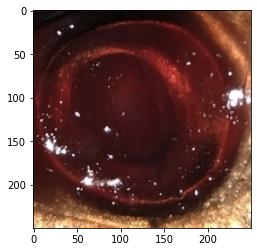

In [ ]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = fn
  img = image.load_img(path, target_size=(250,250))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  
  print(fn)
  if classes==0:
    print('segar')
  else:
    print('taksegar')